In [1]:
import os
os.chdir("/scratch/ak1774/runs")
import wandb


In [11]:
import types
isinstance(wandb.config, types.FunctionType)

False

In [2]:
type(wandb.config)

function

In [5]:
type(wandb.config)

wandb.sdk.wandb_config.Config

In [10]:
wandb.init(project="test_plots", entity="adam_katona")

wandb: Currently logged in as: adam_katona (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [3]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}

AttributeError: 'NoneType' object has no attribute 'name'

In [4]:
wandb.run.name = "run2"

In [5]:
wandb.run.config.update(wandb.config)

In [40]:
a = wandb.config

In [15]:

step_logs = {
    
    ## UPDATE logs ##
    "parent_id" : "26",  # what is the id of the parent who got selected to reproduce
    "parent_eval_results" : {
        "eval_returns_mean" : 3,
        "eval_returns_std" : 1,
    },
    "parent_cell" : [2,7],
    
    "update_type" : "ES_FITNESS",  # can be ES_FITNESS, ES_EVO, ES_INNOV
    
    "pop_returns_mean" : 2.1,
    "pop_returns_best" : 4,
    "pop_returns_std" : 1.1,
    
    "pop_num_cells_occupied" : 51,
    "pop_num_new_cells_occupied" : 24,
    "pop_variability" : 2,
    "pop_innovation" : 1,
    
    "child_id" : "27",
    "child_eval_results" : {
        "eval_returns_mean" : 3.2,
        "eval_returns_std" : 1.1,
    },
    
    ## Overall status logs
    "best_returns_seen" : 5.2,
    "num_cells_occupied" : 86,
    
}


In [19]:
wandb.log(step_logs)
wandb.log(step_logs)
wandb.log(step_logs)
wandb.log(step_logs)

In [26]:
wandb.log({"loss": 3})
wandb.log({"loss": 2})
wandb.log({"loss": 3})
wandb.log({"loss": 1})

In [22]:
a = wandb.run

In [27]:
a = a.history

In [28]:
wandb.run.log(step_logs)

In [30]:
wandb.run.history()

TypeError: 'History' object is not callable

In [ ]:
wandb.Histogram(array)

In [6]:
import wandb
api = wandb.Api()

# run is specified by <entity>/<project>/<run id>
run = api.run("adam_katona/my-test-project/b7s8gvi3")

# save the metrics for the run to a csv file
metrics_dataframe = run.history()
#metrics_dataframe.to_csv("metrics.csv")

In [7]:
metrics_dataframe

,_step,loss,_runtime,_timestamp
0,0,3,43,1636555297
1,1,3,52,1636555306
2,2,2,52,1636555306
3,3,3,52,1636555306
4,4,1,52,1636555306


In [8]:
wandb.config

{'learning_rate': 0.001, 'epochs': 100, 'batch_size': 128}

In [12]:
run.update()

In [11]:
run.config = wandb.config

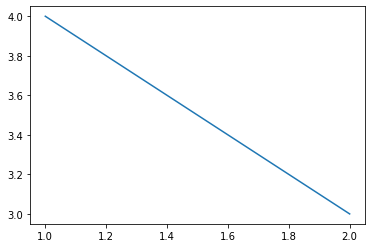

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot([1,2],[4,3])

In [25]:
wandb.log({"fig": fig})

In [27]:
wandb.run.dir

'/scratch/ak1774/runs/wandb/run-20211216_074842-1stxzts2/files'

In [29]:
import numpy as np
a = np.zeros(19)

In [31]:
np.savetxt(wandb.run.dir + "/foo.csv", a, delimiter=",")

In [32]:
wandb.finish()

loss,█▅█▁█▅█▁
loss,1


In [44]:
wandb.run.dir

'/scratch/ak1774/runs/wandb/run-20211216_100348-17q8mx6w/files'

In [49]:
run_name = wandb.run.dir.split("/")[-2]

In [50]:
run_checkpoint_path = "/scratch/ak1774/runs/large_files/" + run_name
os.makedirs(run_checkpoint_path,exist_ok=True)

In [10]:
frames = np.random.randn(10,1,64,64) * 255
wandb.log({"video": wandb.Video(frames, fps=4)})

In [7]:
import numpy as np

In [16]:
np.stack([np.zeros(1)]).shape

(1, 1)

In [20]:
a = np.zeros([2,4])

In [21]:
list(a)

[array([0., 0., 0., 0.]), array([0., 0., 0., 0.])]

In [13]:
2,

(2,)

In [29]:
import pandas as pd 
import wandb
import matplotlib.pyplot as plt

In [39]:
api = wandb.Api()
sweep = api.sweep("adam_katona/uncategorized/nz2cbo33")
sweep_runs = sweep.runs

In [40]:
for run in sweep_runs:
    print(run)

<Run adam_katona/uncategorized/vidkqe4i (failed)>
<Run adam_katona/uncategorized/s0w362cd (finished)>
<Run adam_katona/uncategorized/v22985f2 (finished)>
<Run adam_katona/uncategorized/ck0vwki7 (finished)>
<Run adam_katona/uncategorized/qdloow7p (failed)>
<Run adam_katona/uncategorized/4kpar3iw (finished)>
<Run adam_katona/uncategorized/zb57gcde (finished)>
<Run adam_katona/uncategorized/8hjvmydi (finished)>
<Run adam_katona/uncategorized/bchikxpa (failed)>
<Run adam_katona/uncategorized/o8vtrufz (finished)>
<Run adam_katona/uncategorized/l0sst3kk (finished)>
<Run adam_katona/uncategorized/sfjpyw15 (finished)>


In [41]:
#def group_runs_by_env(runs):
    
env_list = set([run.config["env_id"] for run in sweep_runs])
env_runs_dict = {}
for env in env_list:
    env_runs = []
    for run in sweep_runs:
        if run.config["env_id"] == env:
            env_runs.append(run)
    env_runs_dict[env] = env_runs




In [42]:
for env,runs in env_runs_dict.items():
    print(env)
    for run in runs:
        print(run.config["BMAP_type_and_metrics"])
        print(run)

QDAntBulletEnv-v0
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/ck0vwki7 (finished)>
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/8hjvmydi (finished)>
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/sfjpyw15 (finished)>
QDWalker2DBulletEnv-v0
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/v22985f2 (finished)>
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/zb57gcde (finished)>
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/l0sst3kk (finished)>
QDHopperBulletEnv-v0
{'type': 'multi_map', 'metrics': ['eval_fitness', 'evolvability', 'innovation']}
<Run adam_katona/uncategorized/vidkqe4i (failed)>
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorized/qdloow7p (failed)>
{'type': 'single_map', 'metrics': ['eval_fitness']}
<Run adam_katona/uncategorize

In [25]:
df.keys()

Index(['current_evolvability', 'best_fitness_so_far', '_step', '_runtime',
       'current_children_fitness_std', 'current_children_fitness_mean',
       'current_innovation', 'best_evolvability_so_far',
       'current_eval_fitness', 'evaluations_so_far', 'generation_number',
       '_timestamp', 'cumm_qd_score', 'b_map_cumm_plot', 'b_map_plot',
       'b_map_accumulation_plot', 'cumm_nonempty_cells', 'nonempty_ratio',
       'qd_score', 'cumm_nonempty_ratio', 'nonempty_cells'],
      dtype='object')

In [36]:
sweep_runs[0].config

{'ES_lr': 0.01,
 'env_id': 'QDHopperBulletEnv-v0',
 'ES_sigma': 0.02,
 'env_args': {'use_norm_obs': True},
 'ES_popsize': 2000,
 'ES_L2_COEFF': 0.005,
 'policy_args': {'init': 'normc',
  'layers': [128, 128],
  'activation': 'tanh',
  'action_noise': 0.01},
 'ALGORITHM_TYPE': 'PLAIN_ES',
 'PLOT_FREQUENCY': 100,
 'ES_OPTIMIZER_TYPE': 'ADAM',
 'GA_MUTATION_POWER': 0.02,
 'ES_NUM_GENERATIONS': 1000,
 'GA_NUM_EVALUATIONS': 10,
 'CHECKPOINT_FREQUENCY': 100,
 'GA_MULTI_PARENT_MODE': True,
 'BMAP_type_and_metrics': {'type': 'multi_map',
  'metrics': ['eval_fitness', 'evolvability', 'innovation']},
 'ES_UPDATES_MODES_TO_USE': ['evolvability'],
 'ES_EVALUATION_BATCH_SIZE': 5,
 'ES_PARENT_SELECTION_MODE': 'rank_proportional',
 'GA_PARENT_SELECTION_MODE': 'rank_proportional',
 'ES_CENTRAL_NUM_EVALUATIONS': 30,
 'GA_CHILDREN_PER_GENERATION': 200,
 'map_elites_grid_description': {'bc_limits': [[0, 1], [0, 1], [0, 1], [0, 1]],
  'grid_dims': [6, 6, 6, 6]},
 'GA_MAP_ELITES_NUM_GENERATIONS': 1000,
 'E

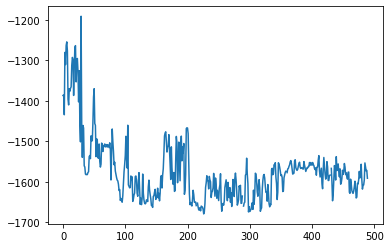

In [30]:
plt.plot(df["current_eval_fitness"])